
## Notebook : Generating Waveforms of Sounds

## Gary Morton  
##### 11/2018

##### Main text: Artificial Intelligence with Python. A Comprehensive Guide to Building Intelligent Apps for Python Beginners and Developers, Prateek Joshi, &copy; Packt Publishing  2017

This notebook explains generation of sound waveforms.

Python code in this notebook is based on [the complimentary code for the book](https://github.com/PacktPublishing/Artificial-Intelligence-with-Python/tree/master/Chapter%2012/code) with modifications.


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Generating audio signals

Use NumPy to generate audio signals as mix of sine waves with predefined parameters.
Create a file name for the generated signal. Specify parameters of the signal:
- Duration in seconds
- Sampling frequency in Hz
- Tone frequency, i.e. the frequency of the sine wave
- Minimum and maximum values, i.e. amplitude.

In [17]:
from scipy.io.wavfile import write

# Output file where the audio will be saved 
output_file = 'generated_audio.wav'

# audio parameters
duration = 4  # in seconds
sampling_freq = 44100  # in Hz
#tone_freq = 784 # in Hz
tone_freq = 146
min_val = -4 * np.pi
max_val = 4 * np.pi

Generate signal, scale it to 16-bit integer values and write it to the file.

In [18]:
t = np.linspace(min_val, max_val, duration * sampling_freq)
signal = np.sin(2 * np.pi * tone_freq * t)

# Scale to 16-bit integer values
scaling_factor = np.power(2, 15) - 1
signal_normalized = signal / np.max(np.abs(signal))
signal_scaled = np.int16(signal_normalized * scaling_factor)

# Save 
write(output_file, sampling_freq, signal_scaled)

Find the new file and play it. How do you like the generated sound?

Add some white noise to the signal and listen again.

In [19]:
# Adding noise
noise = 0.5 * np.random.rand(duration * sampling_freq)
signal += noise

# Scale it to 16-bit integer values
scaling_factor = np.power(2, 15) - 1
signal_normalized = signal / np.max(np.abs(signal))
signal_scaled = np.int16(signal_normalized * scaling_factor)

# Save the audio signal in the output file 
write(output_file, sampling_freq, signal_scaled)

Can you hear difference? Does noise make it better? Change signal frequecy and see what difference it makes.

Plot the first 200 observations of the audio signal.

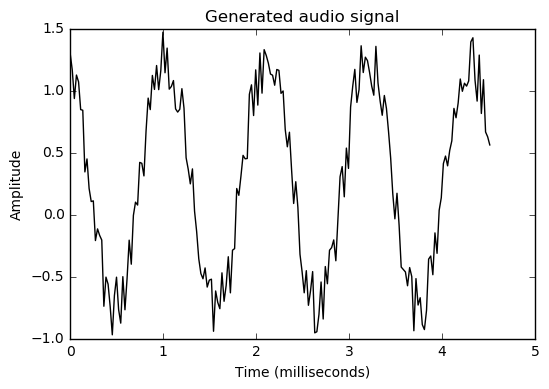

In [20]:
signal = signal[:200]

# time axis in milliseconds
time_axis = 1000 * np.arange(0, len(signal), 1) / float(sampling_freq) 

# plot
plt.plot(time_axis, signal, color='black')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Generated audio signal')
plt.show()

# Synthesizing tones to generate music

The signale generated in the previous section had a single tone (monotone signal). The result was not very pleasant for ear.

We like music because it mixes tones together.

Find frequencies of standard musical tones [here](http://pages.mtu.edu/~suits/notefreqs.html).

In [21]:
# Make sure that /usr/local/bin is in your $PATH.
import json

Define function generating a tone with given frequency, duration, amplitude and sampling frequency:

In [22]:
def tone_synthesizer(freq, duration, amplitude=1.0, sampling_freq=44100):
    # time axis 
    time_axis = np.linspace(0, duration, int(duration * sampling_freq))
    # audio signal
    signal = amplitude * np.sin(2 * np.pi * freq * time_axis)

    return signal.astype(np.int16) 

<font color=blue>
**Assignment** <br>

Practice coding wav files with music.

Below is the first line from an iconic song of the classical hard rock group which has a reason to be mentioned in this course because it is **Deep** Purple. This is also one of the most recognizable song entrance of all times 


![Model plot](https://ilykei.com/api/fileProxy/documents%2FAdvanced%20Machine%20Learning%2FSpeech%20Recognition%2FDeepP.JPG)

<font color=blue>
Write a code that creates a wav file that plays this music.
    
1. Use file `tone_mapping_new.json` to extract frequencies of main tones
2. Create a list of tuples, one for each chord, containing first tone, second tone of the chord, chord duration in seconds and chord amplitude. This list of tuples is the code of the music. Note that there are 2 rests in the music. How would you represent these rests in your list of tuples?
3. Select sampling frequency corresponding to CD quality (44100 Hz). Select regular amplitude of 12000
4. Initialize waveform signal as an empty NumPy array `np.array([])`
5. Loop through all chords of the musicwith following steps:
    - Extract frequencies of each tone, duration and amplitude
    - Synthesize each chord waveform
    - Combine the tones in a chord
    - Append the normalized chord to the signal
6. Normalize the signal    
7. Write the signal to a wav file and play it back

In [30]:
tone_freqf

349.23

In [34]:
# Set parameters
tone_name_a = 'A4f'
tone_name_b = 'B4f'
tone_name_c = 'C5'
tone_name_d = 'D4'
tone_name_f = 'F4'
tone_name_g = 'G4'
dur_egth =.25 
dur_qtr =.5    
dur_hlf= 1 
dur_whl= 2 # seconds
amplitude = 12000
rst_amplitude = 0
sampling_freq = 44100    # Hz
mapping_file = 'tone_mapping_new.json'

# Load mapping file
with open(mapping_file, 'r') as f:
    tone_map = json.loads(f.read())
    
# Extract the tone frequency
tone_freqa = tone_map[tone_name_a]
tone_freqb = tone_map[tone_name_b]
tone_freqc = tone_map[tone_name_c]
tone_freqd = tone_map[tone_name_d]
tone_freqeflat = 311.13
tone_freqe = 349.23
tone_freqf = tone_map[tone_name_f]
tone_freqg = tone_map[tone_name_g]


# Note - 1) missing E and #/Flat notes, 2) R is a rest 
# Library is also composed of notes and durations, along with chords and durations
# Adding the duration is likely not necessary and one could genereate the synthezized tone with a duration via function 
# One could also just make a single duration of 64 notes and then append to make 16th, 8ths, 1/4s, 1/2s and wholes, as 
# is done here with the last 1/2 note vie appending two 1/4 duration chords 

# Generate single tones 
# Eighth Tones
synth_tone_A_egh = tone_synthesizer(tone_freqa, dur_egth, amplitude, sampling_freq)
synth_tone_B_egh = tone_synthesizer(tone_freqb, dur_egth, amplitude, sampling_freq)
synth_tone_C_egh = tone_synthesizer(tone_freqc, dur_egth, amplitude, sampling_freq)
synth_tone_D_egh = tone_synthesizer(tone_freqd, dur_egth, amplitude, sampling_freq)
synth_tone_F_egh = tone_synthesizer(tone_freqf, dur_egth, amplitude, sampling_freq)
synth_tone_G_egh = tone_synthesizer(tone_freqf, dur_egth, amplitude, sampling_freq)
synth_tone_R_egh = tone_synthesizer(tone_freqa, dur_egth, rst_amplitude, sampling_freq)

# Generate chord-8th 
synth_chord_DG_set = synth_tone_D_egh + synth_tone_G_egh
synthe_chord_DG_egh = np.int16(synth_chord_DG_set/np.max(np.abs(synth_chord_DG_set)) * scaling_factor)
synth_chord_FB_set = synth_tone_F_egh + synth_tone_B_egh
synthe_chord_FB_egh = np.int16(synth_chord_FB_set/np.max(np.abs(synth_chord_FB_set)) * scaling_factor)
synth_chord_GC_set = synth_tone_G_egh + synth_tone_C_egh
synthe_chord_GC_egh = np.int16(synth_chord_GC_set/np.max(np.abs(synth_chord_GC_set)) * scaling_factor)
synth_chord_AD_set = synth_tone_A_egh + synth_tone_D_egh
synthe_chord_AD_egh = np.int16(synth_chord_AD_set/np.max(np.abs(synth_chord_AD_set)) * scaling_factor)


# Quarter Tones
synth_tone_A_qtr = tone_synthesizer(tone_freqa, dur_qtr, amplitude, sampling_freq)
synth_tone_B_qtr = tone_synthesizer(tone_freqb, dur_qtr, amplitude, sampling_freq)
synth_tone_C_qtr = tone_synthesizer(tone_freqc, dur_qtr, amplitude, sampling_freq)
synth_tone_D_qtr = tone_synthesizer(tone_freqd, dur_qtr, amplitude, sampling_freq)
synth_tone_F_qtr = tone_synthesizer(tone_freqf, dur_qtr, amplitude, sampling_freq)
synth_tone_G_qtr = tone_synthesizer(tone_freqf, dur_qtr, amplitude, sampling_freq)
synth_tone_R_qtr = tone_synthesizer(tone_freqa, dur_qtr, rst_amplitude, sampling_freq)

# Generate chord-1/4 notes 
synth_chord_DG_set  = synth_tone_D_qtr  + synth_tone_G_qtr 
synthe_chord_DG_qtr = np.int16(synth_chord_DG_set/np.max(np.abs(synth_chord_DG_set)) * scaling_factor)
synth_chord_FB_set  = synth_tone_F_qtr  + synth_tone_B_qtr 
synthe_chord_FB_qtr = np.int16(synth_chord_FB_set/np.max(np.abs(synth_chord_FB_set)) * scaling_factor)
synth_chord_GC_set  = synth_tone_G_qtr  + synth_tone_C_qtr 
synthe_chord_GC_qtr = np.int16(synth_chord_GC_set/np.max(np.abs(synth_chord_GC_set)) * scaling_factor)
synth_chord_AD_set  = synth_tone_A_qtr  + synth_tone_D_qtr 
synthe_chord_AD_qtr = np.int16(synth_chord_AD_set/np.max(np.abs(synth_chord_AD_set)) * scaling_factor)

# 1/2 and whole notes Eflat and D Whole 
synth_tone_Ef_half = tone_synthesizer(tone_freqeflat, dur_hlf, amplitude, sampling_freq)
synth_tone_D_whole = tone_synthesizer(tone_freqd, dur_whl, amplitude, sampling_freq)

print('Frequency A: ',tone_freqa,'Frequency B: ',tone_freqb)
print('Frequency C: ',tone_freqc,'Frequency D: ',tone_freqd)
print('Frequency F: ',tone_freqf,'Frequency F: ',tone_freqg)
# Generate single tones 

Frequency A:  415.3 Frequency B:  466.16
Frequency C:  523.25 Frequency D:  293.66
Frequency F:  349.23 Frequency F:  392


## Song Map <font color=blue> Smoke on the Water 
    dg/4 fb/4 gc/4 rest/8 dg/8, rest/4 fb/4 aflaltdflat/8 gc/2

     in tuple # [('d4','g4'. 0.5, 12000)]

In [25]:
BuildSignal=np.array([])
BuildSignal = np.append(BuildSignal,synthe_chord_DG_qtr)
print('BuildSignal: ',BuildSignal)
print('length: ',len(BuildSignal))
BuildSignal = np.append(BuildSignal,synthe_chord_FB_qtr)
print('BuildSignal: ',BuildSignal)
print('length: ',len(BuildSignal))
BuildSignal = np.append(BuildSignal,synthe_chord_GC_qtr)
print('BuildSignal: ',BuildSignal)
print('length: ',len(BuildSignal))
BuildSignal = np.append(BuildSignal,synth_tone_R_egh)
print('BuildSignal: ',BuildSignal)
print('length: ',len(BuildSignal))
BuildSignal = np.append(BuildSignal,synthe_chord_DG_egh)
print('BuildSignal: ',BuildSignal)
print('length: ',len(BuildSignal))
BuildSignal = np.append(BuildSignal,synth_tone_R_qtr)
print('BuildSignal: ',BuildSignal)
print('length: ',len(BuildSignal))
BuildSignal = np.append(BuildSignal,synthe_chord_AD_egh)
print('BuildSignal: ',BuildSignal)
print('length: ',len(BuildSignal))
BuildSignal = np.append(BuildSignal,synthe_chord_GC_qtr)
print('BuildSignal: ',BuildSignal)
print('length: ',len(BuildSignal))
BuildSignal = np.append(BuildSignal,synthe_chord_GC_qtr)
print('BuildSignal: ',BuildSignal)
print('length: ',len(BuildSignal))

BuildSignal:  [     0.   1497.   2997. ..., -24528. -24885. -25191.]
length:  22050
BuildSignal:  [    0.  1497.  2997. ..., -3638. -3287. -2941.]
length:  44100
BuildSignal:  [     0.   1497.   2997. ..., -19295. -20900. -22419.]
length:  66150
BuildSignal:  [    0.  1497.  2997. ...,     0.     0.     0.]
length:  77175
BuildSignal:  [     0.   1497.   2997. ...,  25320.  24522.  23670.]
length:  88200
BuildSignal:  [    0.  1497.  2997. ...,     0.     0.     0.]
length:  110250
BuildSignal:  [    0.  1497.  2997. ..., -5885. -6090. -6260.]
length:  121275
BuildSignal:  [     0.   1497.   2997. ..., -19295. -20900. -22419.]
length:  143325
BuildSignal:  [     0.   1497.   2997. ..., -19295. -20900. -22419.]
length:  165375


In [26]:
BuildSignalNrml = np.int16(BuildSignal/np.max(np.abs(BuildSignal)) * scaling_factor)

In [27]:
BuildSignalNrml

array([     0,   1497,   2997, ..., -19295, -20900, -22419], dtype=int16)

In [28]:
write('SmokeWater_GM.wav', sampling_freq, BuildSignalNrml)

#### song map   <font color=blue> Symphony No. 5 (Beethoven)
Key is C Minor 2/4 time: 
opening stanza is:  r1/8. b1/8,b1/8,b1/8 Eflat1/2, r 1/8, F1/8,F1/8, F1/8, D whole  

In [35]:
BldSgnl=np.array([])
BldSgnl = np.append(BldSgnl,synth_tone_R_egh)
BldSgnl = np.append(BldSgnl,synth_tone_B_egh)
BldSgnl = np.append(BldSgnl,synth_tone_B_egh)
BldSgnl = np.append(BldSgnl,synth_tone_B_egh)
BldSgnl = np.append(BldSgnl,synth_tone_Ef_half)
BldSgnl = np.append(BldSgnl,synth_tone_R_egh)
BldSgnl = np.append(BldSgnl,synth_tone_F_egh)
BldSgnl = np.append(BldSgnl,synth_tone_F_egh)
BldSgnl = np.append(BldSgnl,synth_tone_F_egh)
BldSgnl = np.append(BldSgnl,synth_tone_D_whole)


In [36]:
BldSgnlNrml = np.int16(BldSgnl/np.max(np.abs(BldSgnl)) * scaling_factor)

In [37]:
write('Beethoven5th_GM.wav', sampling_freq, BldSgnlNrml)